In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Pea Flowers

In [3]:
null = make_array('Purple', 'Purple', 'Purple', 'White')

def test_stat(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return abs(proportion_purple - 0.75)

total_plants = 929
purple = 705
observed_statistic = abs(purple / total_plants - 0.75) # 705 were Purple
observed_statistic

0.008880516684607098

In [4]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(null, total_plants)
    sampled_stats = np.append(sampled_stats, test_stat(new_sample))

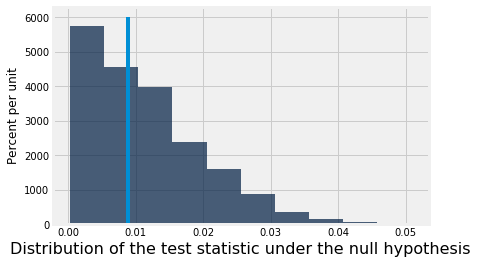

In [5]:
null_dist = Table().with_column('Distribution of the test statistic under the null hypothesis', sampled_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

## P-value

In [6]:
# The P-value (an approximation based on the simulation)
np.count_nonzero(sampled_stats >= observed_statistic)/repetitions

0.5506

## Discussion Question: What Happens If...

I remove the absolute value from the test statistic?

In [7]:
def test_stat(sample):
    prop_purple = (np.count_nonzero(sample == 'Purple')
                   / len(sample)
                   - 0.75)
    return prop_purple

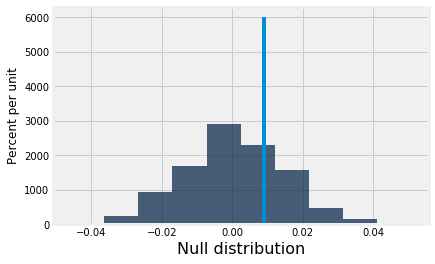

In [8]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

**Test statistic: proportion of purple - 0.75 (no absolute value this time)**

In [10]:
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)
# the previous p-value was around 0.54. Why is it different this time?

0.2864

## Another One

What if my test statistic is:

In [ ]:
def test_stat(sample):
    ...

In [ ]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    stat = test_stat(np.random.choice(null, total_plants))
    sample_stats = np.append(sample_stats, stat)
    
null_dist = Table().with_columns('Null distribution', sample_stats)
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])